In [1]:
import fastmapsvm as fm
import h5py
import numpy as np
import sklearn.metrics

In [2]:
def correlation_distance(a, b):
    """
    Returns the correlation distance between objects a and b.
    """
    return (
        1 - np.max(np.abs(np.mean(fm.distance.ndcorrelate(a, b, mode="same"), axis=0)))
    )

In [3]:
model_path = "../data/ridgecrest_model.hdf5"
data_path  = "../data/ridgecrest.hdf5"

with h5py.File(data_path, mode="r") as f5:
    clf = fm.FastMapSVM(
        correlation_distance,
        8,
        model_path
    )
    clf.fit(f5["/X/train"], f5["/y/train"])

  0%|          | 0/8 [00:00<?, ?it/s]

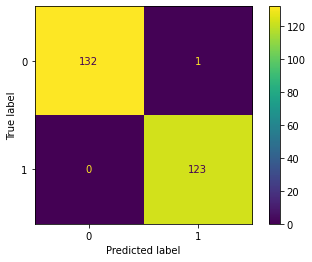

In [6]:
with h5py.File(data_path, mode="r") as f5:
    y_true = f5["/y/test"][:]
    proba = clf.predict_proba(f5["/X/test"], f5["/y/test"])
    
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(
    y_true, 
    proba[:, 1] > 0.5
);